In [140]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go

In [141]:
df_barca = pd.read_csv('benchmark_experiments_barca.csv').rename(columns=lambda col: col.strip())
df_barca['track'] = 'barca'
df_walker = pd.read_csv('benchmark_experiments_racecar_walker.csv').rename(columns=lambda col: col.strip())
df_walker['track'] = 'walker'
df_porto = pd.read_csv('benchmark_experiments_porto.csv').rename(columns=lambda col: col.strip())
df_porto['track'] = 'porto'

In [142]:
results = pd.concat([df_barca,df_walker,df_porto])
results['LEC Usage (%)'] = results['time_taken_lec']/results['total_time'] 
results['Safety Controller (%)'] = results['time_taken_safety_controller'] / results['total_time']
results

,time_string,time_taken_lec,time_taken_safety_controller,total_time,wcet,mean_reach_time,track,LEC Usage (%),Safety Controller (%)
0,17/02/2021/19:01:26,0.608143,21.34580,21.95400,0.066337,0.017489,barca,0.027701,0.972297
1,17/02/2021/19:03:06,0.267603,20.47160,20.73920,0.072020,0.016206,barca,0.012903,0.987097
2,17/02/2021/19:04:30,0.270863,20.37280,20.64370,0.053363,0.016413,barca,0.013121,0.986877
3,17/02/2021/19:06:10,0.307966,19.78680,20.09480,0.399027,0.016221,barca,0.015326,0.984673
4,17/02/2021/19:07:48,0.227950,19.98360,20.21150,0.058467,0.016037,barca,0.011278,0.988724
...,...,...,...,...,...,...,...,...,...
25,17/02/2021/16:57:19,13.495800,18.27020,31.76600,0.052940,0.029537,porto,0.424850,0.575150
26,17/02/2021/16:58:48,15.760000,16.23760,31.99750,0.052903,0.029510,porto,0.492538,0.507465
27,17/02/2021/17:00:29,0.249070,5.67068,5.91975,0.042822,0.001975,porto,0.042074,0.957926
28,17/02/2021/17:02:14,15.850100,17.28810,33.13820,0.054502,0.030354,porto,0.478303,0.521697


In [143]:
results.groupby('track').median().reset_index()

,track,time_taken_lec,time_taken_safety_controller,total_time,wcet,mean_reach_time,LEC Usage (%),Safety Controller (%)
0,barca,0.287813,19.7092,20.09480,0.058467,0.015991,0.014205,0.985796
1,porto,15.310850,17.5103,33.43290,0.054496,0.029599,0.457532,0.542469
2,walker,3.331130,34.3173,38.42325,0.052000,0.035232,0.088867,0.911132


In [144]:
results

,time_string,time_taken_lec,time_taken_safety_controller,total_time,wcet,mean_reach_time,track,LEC Usage (%),Safety Controller (%)
0,17/02/2021/19:01:26,0.608143,21.34580,21.95400,0.066337,0.017489,barca,0.027701,0.972297
1,17/02/2021/19:03:06,0.267603,20.47160,20.73920,0.072020,0.016206,barca,0.012903,0.987097
2,17/02/2021/19:04:30,0.270863,20.37280,20.64370,0.053363,0.016413,barca,0.013121,0.986877
3,17/02/2021/19:06:10,0.307966,19.78680,20.09480,0.399027,0.016221,barca,0.015326,0.984673
4,17/02/2021/19:07:48,0.227950,19.98360,20.21150,0.058467,0.016037,barca,0.011278,0.988724
...,...,...,...,...,...,...,...,...,...
25,17/02/2021/16:57:19,13.495800,18.27020,31.76600,0.052940,0.029537,porto,0.424850,0.575150
26,17/02/2021/16:58:48,15.760000,16.23760,31.99750,0.052903,0.029510,porto,0.492538,0.507465
27,17/02/2021/17:00:29,0.249070,5.67068,5.91975,0.042822,0.001975,porto,0.042074,0.957926
28,17/02/2021/17:02:14,15.850100,17.28810,33.13820,0.054502,0.030354,porto,0.478303,0.521697


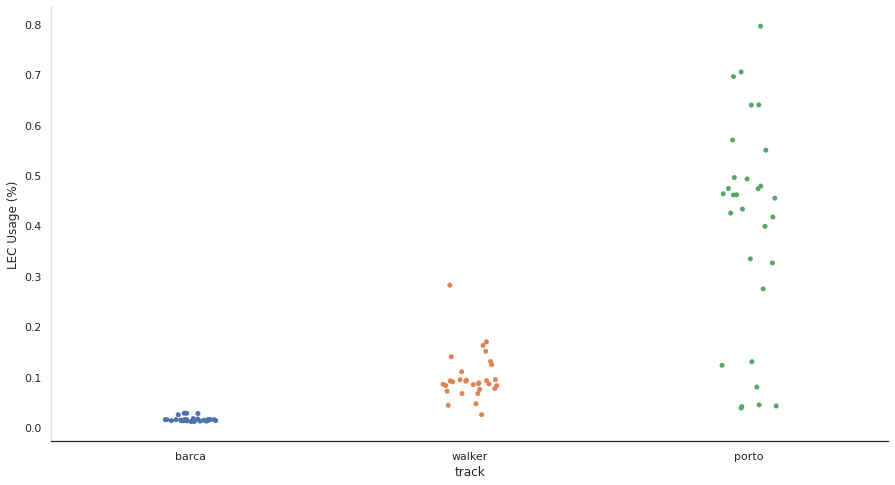

In [145]:
plt.figure(figsize=(15,8))
ax =  sns.stripplot(x="track", y="LEC Usage (%)", data=results)
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)

In [146]:
bar_plot = results.groupby('track').median().reset_index()
fig2 = go.Figure(
    data=[
        go.Bar(
            name="Safety Controller",
            x=bar_plot["track"],
            y=bar_plot["Safety Controller (%)"],
            offsetgroup=0,
        ),
        go.Bar(
            name="LEC",
            x=bar_plot["track"],
            y=bar_plot["LEC Usage (%)"],
            offsetgroup=1,
        ),
    ],
    layout=go.Layout(
        title="Track and Controller Usage",
        yaxis_title="Usage %",
        xaxis_title="Track",
        barmode='relative'
    )
)

fig2.show()
